# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
- /datasets/geo_data_0.csv.  
- /datasets/geo_data_1.csv.  
- /datasets/geo_data_2.csv.  
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Условия задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью

## Загрузка и подготовка данных

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Открытие первого файла с данными

In [2]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/8. Машинное обучение в бизнесе/Проект/geo_data_0.csv'
path_2 = 'https://code.s3.yandex.net/datasets/geo_data_0.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/geo_data_0.csv'
path_4 = '/datasets/geo_data_0.csv'

if os.path.exists(path_1):
    data_0 = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    data_0 = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    data_0 = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    data_0 = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

### Открытие второго файла с данными

In [3]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/8. Машинное обучение в бизнесе/Проект/geo_data_1.csv'
path_2 = 'https://code.s3.yandex.net/datasets/geo_data_1.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/geo_data_1.csv'
path_4 = '/datasets/geo_data_1.csv'

if os.path.exists(path_1):
    data_1 = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    data_1 = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    data_1 = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    data_1 = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

### Открытие третьего файла с данными

In [4]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/8. Машинное обучение в бизнесе/Проект/geo_data_2.csv'
path_2 = 'https://code.s3.yandex.net/datasets/geo_data_2.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/geo_data_2.csv'
path_4 = '/datasets/geo_data_2.csv'

if os.path.exists(path_1):
    data_2 = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    data_2 = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    data_2 = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    data_2 = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

### Получение информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

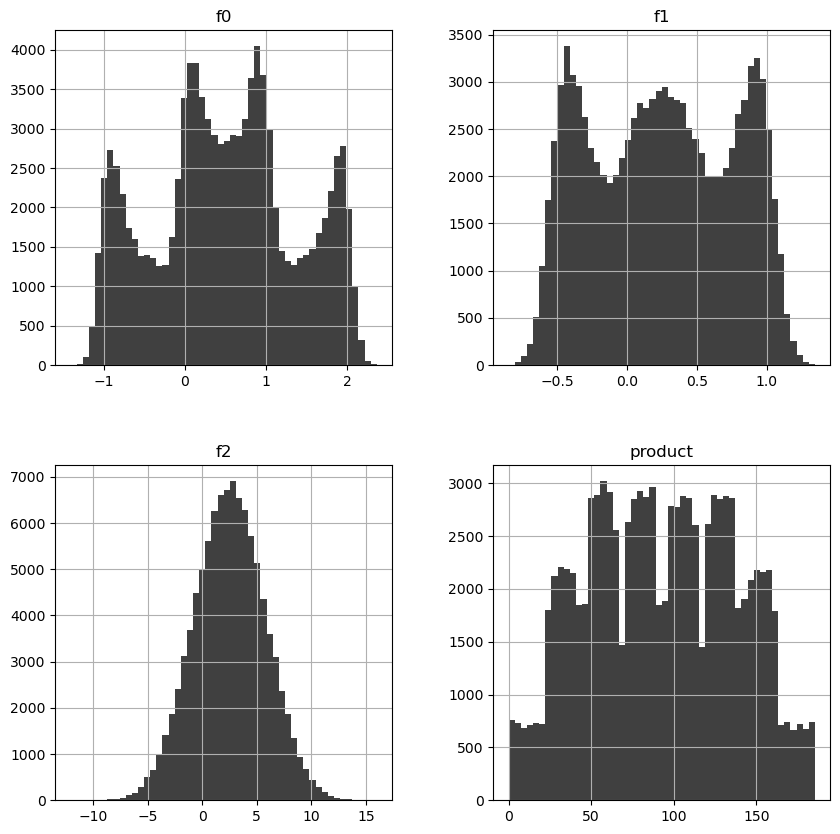

In [5]:
print(data_0.info())
display(data_0.head())
data_0.hist(bins = 50, color = 'black', alpha = 0.75, figsize = (10, 10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

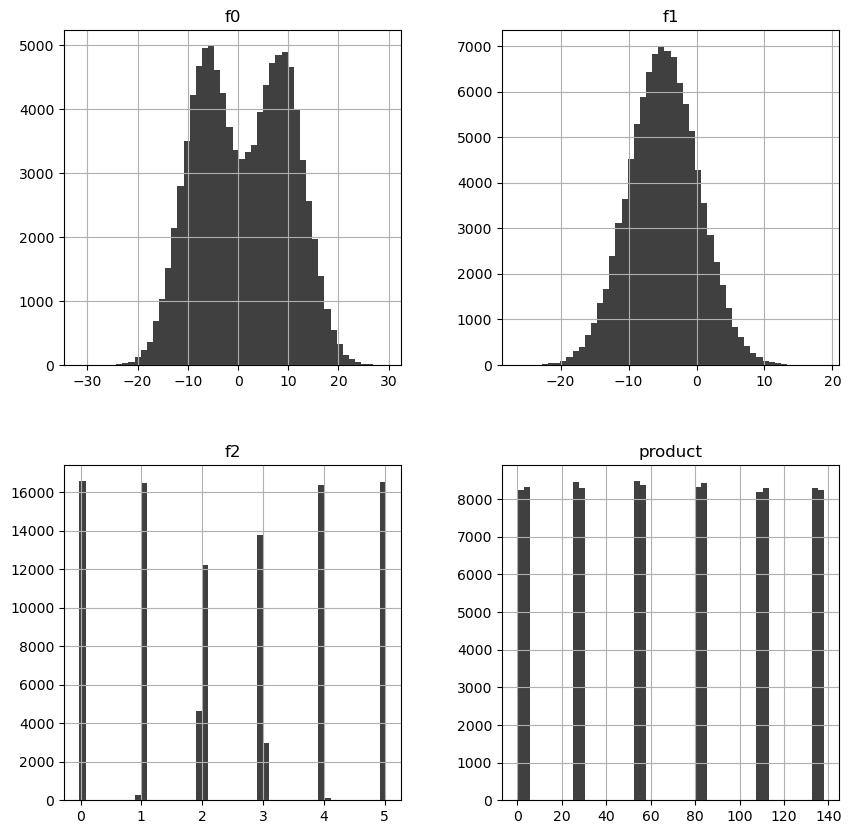

In [6]:
print(data_1.info())
display(data_1.head())
data_1.hist(bins = 50, color = 'black', alpha = 0.75, figsize = (10, 10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

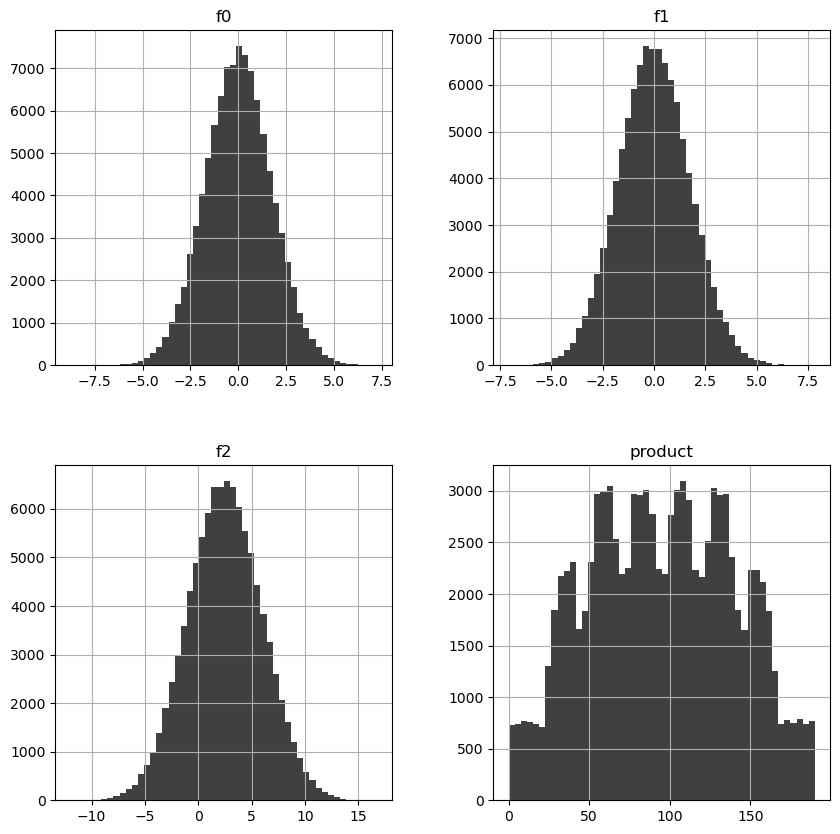

In [7]:
print(data_2.info())
display(data_2.head())
data_2.hist(bins = 50, color = 'black', alpha = 0.75, figsize = (10, 10))

In [8]:
data_0 = data_0.drop('id', axis = 1)
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [9]:
data_1 = data_1.drop('id', axis = 1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


### Удаление лишних столбцов из данных

In [10]:
data_2 = data_2.drop('id', axis = 1)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


### Разделение данных на выборки

In [11]:
data_0_train, data_0_valid = train_test_split(data_0, test_size=0.25, random_state=12345)
data_1_train, data_1_valid = train_test_split(data_1, test_size=0.25, random_state=12345)
data_2_train, data_2_valid = train_test_split(data_2, test_size=0.25, random_state=12345)

print('Размер обучающей выборки для geo_data_0:', data_0_train.shape[0])
print('Размер валидационной выборки для geo_data_0:', data_0_valid.shape[0])
print()
print('Размер обучающей выборки для geo_data_1:', data_1_train.shape[0])
print('Размер валидационной выборки для geo_data_1:', data_1_valid.shape[0])
print()
print('Размер обучающей выборки для geo_data_2:', data_1_train.shape[0])
print('Размер валидационной выборки для geo_data_2:', data_2_valid.shape[0])

Размер обучающей выборки для geo_data_0: 75000
Размер валидационной выборки для geo_data_0: 25000

Размер обучающей выборки для geo_data_1: 75000
Размер валидационной выборки для geo_data_1: 25000

Размер обучающей выборки для geo_data_2: 75000
Размер валидационной выборки для geo_data_2: 25000


In [12]:
data_0_train_features = data_0_train.drop('product', axis = 1)
data_0_train_target = data_0_train['product']
data_0_valid_features = data_0_valid.drop('product', axis = 1)
data_0_valid_target = data_0_valid['product']

data_1_train_features = data_1_train.drop('product', axis = 1)
data_1_train_target = data_1_train['product']
data_1_valid_features = data_1_valid.drop('product', axis = 1)
data_1_valid_target = data_1_valid['product']

data_2_train_features = data_2_train.drop('product', axis = 1)
data_2_train_target = data_2_train['product']
data_2_valid_features = data_2_valid.drop('product', axis = 1)
data_2_valid_target = data_2_valid['product']

data_0_valid_target = data_0_valid_target.reset_index(drop = True)
data_1_valid_target = data_1_valid_target.reset_index(drop = True)
data_2_valid_target = data_2_valid_target.reset_index(drop = True)

### Промежуточный вывод

Получены данные о характеристиках скважин в трех регионах. Получена основная информация об исходных данных, построены гистограммы (не более чем для визуализации), рассмотрен общий вид данных. 

Пропусков и выбросов в данных нет.

## Обучение и проверка модели

### Функция для расчета RMSE

In [13]:
def rmse(answers, predictions):
    from sklearn.metrics import mean_squared_error 
    mse = mean_squared_error(answers, predictions)
    
    return mse ** 0.5

### Обучение модели для первого региона, подсчет среднего запаса сырья (в тыс. баррелей), расчет RMSE  

In [14]:
model = LinearRegression()
model.fit(data_0_train_features, data_0_train_target)
data_0_predictions = model.predict(data_0_valid_features)

region_1_rmse_predict = rmse(data_0_valid_target, data_0_predictions)
region_1_mean_product_predict = data_0_predictions.mean()
data_0_predictions = pd.Series(data_0_predictions)

print('RMSE модели для 1-го региона:',region_1_rmse_predict)
print('Средний запас предсказанного сырья в 1-м регионе:', region_1_mean_product_predict)

RMSE модели для 1-го региона: 37.5794217150813
Средний запас предсказанного сырья в 1-м регионе: 92.59256778438035


### Обучение модели для второго региона, подсчет среднего запаса сырья (в тыс. баррелей), расчет RMSE  

In [15]:
model = LinearRegression()
model.fit(data_1_train_features, data_1_train_target)
data_1_predictions = model.predict(data_1_valid_features)

region_2_rmse_predict = rmse(data_1_valid_target, data_1_predictions)
region_2_mean_product_predict = data_1_predictions.mean()
data_1_predictions = pd.Series(data_1_predictions)

print('RMSE модели для 2-го региона:', region_2_rmse_predict)
print('Средний запас предсказанного сырья в 2-м регионе:', region_2_mean_product_predict)


RMSE модели для 2-го региона: 0.8930992867756182
Средний запас предсказанного сырья в 2-м регионе: 68.728546895446


### Обучение модели для третьего региона, подсчет среднего запаса сырья (в тыс. баррелей), расчет RMSE  

In [16]:
model = LinearRegression()
model.fit(data_2_train_features, data_2_train_target)
data_2_predictions = model.predict(data_2_valid_features)

region_3_rmse_predict = rmse(data_2_valid_target, data_2_predictions)
region_3_mean_product_predict = data_2_predictions.mean()
data_2_predictions = pd.Series(data_2_predictions)

print('RMSE модели для 3-го региона:', region_3_rmse_predict)
print('Средний запас предсказанного сырья в 3-м регионе:', region_3_mean_product_predict)


RMSE модели для 3-го региона: 40.02970873393434
Средний запас предсказанного сырья в 3-м регионе: 94.96504596800489


### Промежуточный вывод

Обучены модели линейной регрессии для каждого региона. Рассчитан средний запас предсказанного сырья в каждом регионе, рассчитано RMSE модели для каждого региона. 

## Подготовка к расчёту прибыли

### Необходимые для расчетов значения

In [17]:
well_budget = 10**10                # бюджет на разработку скважины
income_per_barrel = 450             # доход с одной баррели
income_per_product = 450 * 10**3    # доход с единицы продукта (так как объем указан в тысячах баррелей)
best_wells = 200

In [18]:
break_even = well_budget / income_per_product
print('Минимальный объем запасов для безубыточной разработки скважины:', round(break_even, 3), 'тысяч баррелей')

Минимальный объем запасов для безубыточной разработки скважины: 22222.222 тысяч баррелей


In [19]:
region_product_break_even = break_even / best_wells
print('Объем нефти в скважине для безубыточного функционирования:', round(region_product_break_even, 3), 'тысяч баррелей')

Объем нефти в скважине для безубыточного функционирования: 111.111 тысяч баррелей


In [20]:
if region_product_break_even > region_1_mean_product_predict:
    print('Средний запас предсказанного сырья в 1-м регионе меньше объема для безубыточной разработки!')
else:
    print('Средний запас предсказанного сырья в 1-м регионе больше или равен объему для безубыточной разработки.')

if region_product_break_even > region_2_mean_product_predict:
    print('Средний запас предсказанного сырья в 2-м регионе меньше объема для безубыточной разработки!')
else:
    print('Средний запас предсказанного сырья в 2-м регионе больше или равен объему для безубыточной разработки.')

if region_product_break_even > region_3_mean_product_predict:
    print('Средний запас предсказанного сырья в 3-м регионе меньше объема для безубыточной разработки!')
else:
    print('Средний запас предсказанного сырья в 3-м регионе больше или равен объему для безубыточной разработки.')

Средний запас предсказанного сырья в 1-м регионе меньше объема для безубыточной разработки!
Средний запас предсказанного сырья в 2-м регионе меньше объема для безубыточной разработки!
Средний запас предсказанного сырья в 3-м регионе меньше объема для безубыточной разработки!


### Промежуточный вывод

Все необходимые данные из условия задачи сохранены в отдельные переменные. Рассчитана точка безубыточности. Средний запас предсказанного сырья в каждом регионе меньше, чем необходимо для безубыточной разработки месторождений.

## Расчёт прибыли и рисков 

### Функция подсчета прибыли

In [21]:
def profit(predictions, target):
    best_predictions = predictions.sort_values(ascending = False)
    best_targets = target[best_predictions.index].head(200)
    revenue = best_targets.sum() * income_per_product

    return revenue - well_budget

In [22]:
state = np.random.RandomState(12345)

### Функция подсчета рисков

In [23]:
def calculate_risk(profits):
    profit_minus = profits.loc[profits <= 0]

    return len(profit_minus) / len(profits) * 100

### Bootstrap

In [24]:
region = 1

for predictions, targets in zip([data_0_predictions, data_1_predictions, data_2_predictions], 
                                [data_0_valid_target, data_1_valid_target, data_2_valid_target]):
    profits = []

    for j in range(1000):
        target_sample = targets.sample(500, replace = True, random_state = state)
        predictions_sample = predictions[target_sample.index]
        profits.append(profit(predictions_sample, target_sample))

    profits = pd.Series(profits)
    interval_low = round(profits.quantile(0.025), 3)
    interval_high = round(profits.quantile(0.975), 3)
    mean_profit = round(profits.mean(), 3)
    risk = calculate_risk(profits)
    
    print('Регион', region, ':')
    print('Средняя прибыль:', mean_profit, 'руб.')
    print('95% доверительный интервал:', (interval_low, interval_high))
    print('Риск:', risk, '%')
    print()

    region += 1

Регион 1 :
Средняя прибыль: 425938526.911 руб.
95% доверительный интервал: (-102090094.838, 947976353.358)
Риск: 6.0 %

Регион 2 :
Средняя прибыль: 518259493.697 руб.
95% доверительный интервал: (128123231.433, 953612982.067)
Риск: 0.3 %

Регион 3 :
Средняя прибыль: 420194005.344 руб.
95% доверительный интервал: (-115852609.16, 989629939.845)
Риск: 6.2 %



### Промежуточный вывод

Для каждого региона с помощью bootstrap определен 95-и процентный доверительный интервал, оценена средняя прибыль и риск разработки в регионе. Наименьшие риски имеет разработка месторождений во 2-м регионе. 

## Выводы

Проведен небольшой исследовательский анализ данных, особая предобработка данных не потребовалась. Обучены модели линейной регрессии, получены средние значения предсказанного объема сырья и рассчитано RMSE моделей. Средний запас сырья для каждого региона меньше, чем необходимо для безубыточной разработки месторождений. Для каждого региона проведена процедура bootstrap, рассчитан доверительный интервал и оценены риски разработки, также оценена средняя прибыль разработки в регионе.

Наилучшие показатели рисков и средней прибыли показывает **2-й регион**:
- риск разработки - 0.3%;
- средняя прибыль - 51,825,949 руб;
- 95% доверительный интервал содержит только положительные значения прибыли.